In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
dataset = pd.DataFrame(data=boston.data, columns=boston.feature_names)
target_vector = pd.DataFrame(data=boston.target, columns=["MEDV"])

In [4]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
def plot_two_vars(independent, dependent="MEDV"):
    if dependent == "MEDV":
        plt.scatter(dataset[independent], target_vector["MEDV"])
    else:
        plt.scatter(dataset[independent], dataset[dependent])

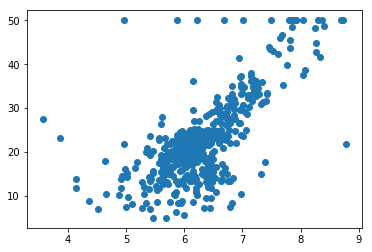

In [6]:
plot_two_vars("RM")

## We think that the `LSTAT` feature (% lower status of population) correlates well with `MEDV` and we'd like to perform linear regression using that independent feature. 

### `STEP 1`: Partition our independent (X) and dependent (y) data into training and testing samples.

In [7]:
X = np.array(dataset["LSTAT"]).reshape(-1, 1)
y = np.array(target_vector["MEDV"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
len(X), len(y)

(506, 506)

In [9]:
(len(X_train), len(X_test)), (len(y_train), len(y_test))

((379, 127), (379, 127))

### `STEP 2`: Instantiate our model.

In [10]:
model_LinReg = LinReg()

### `STEP 3`: Fit our model to our _training_ data. (`X_train` and `y_train`)

In [11]:
model_LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### `STEP 4`: Produce predictions for `X_test` and save to new array object. (`y_pred`)

In [12]:
y_pred = model_LinReg.predict(X_test)

In [13]:
# NOTE: This custom error checking is really only good for classification accuracy testing.
# NOTE: Since we are not doing classification (we're doing regression), this error is not accurate.

# err, size = 0, len(y_pred)

# for index, value in enumerate(y_pred):
#     if value != y_test[index]:
#         err += 1

# print(err/size)

### `STEP 5`: Check _accuracy_ between `y_pred` and `y_test` (accuracy of model). 

#### NOTE: R^2 should be HIGHER for better validity; there exist other error-based accuracy metrics (MSE, etc.).

In [14]:
r2_score = model_LinReg.score(X_test, y_test)
r2_score

0.5619670683556283

In [15]:
m, b = model_LinReg.coef_[0][0], model_LinReg.intercept_[0]
print("y = {:.4f}X + {:.4f}".format(m, b))

y = -0.8864X + 33.5464


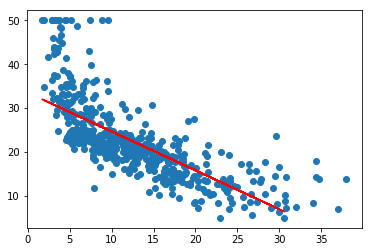

In [16]:
plot_two_vars("LSTAT")

y_fit = [(m * point) + b for point in X_test]
plt.plot(X_test, y_fit, c="r")

## We think we can improve model performance by including `RM` into our independent variable list. Therefore, we will test two independent variables (`LSTAT`, `RM`) against one target variable (`MEDV`). 

In [17]:
total_score = 0
for _ in range(100):
    # STEP 1: Partition our independent (X) and dependent (y) data into training and testing samples.
#     X = np.c_[dataset['LSTAT'], dataset['RM']]
    X = dataset
    y = np.array(target_vector["MEDV"]).reshape(-1, 1)

    # STEP 2: Split our data into training and testing samples.
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # STEP 3: Instantiate our model.
    model_LinReg = LinReg()

    # STEP 4: Fit our model to the training data.
    model_LinReg.fit(X_train, y_train)

    # STEP 5: Get score of model accuracy.
    r2_score = model_LinReg.score(X_test, y_test)
    total_score += r2_score

In [18]:
total_score / 100

0.7035692858068652

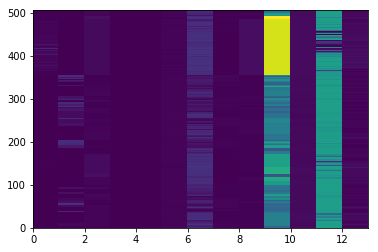

In [19]:
plt.pcolor(dataset)
#What the heck is this?

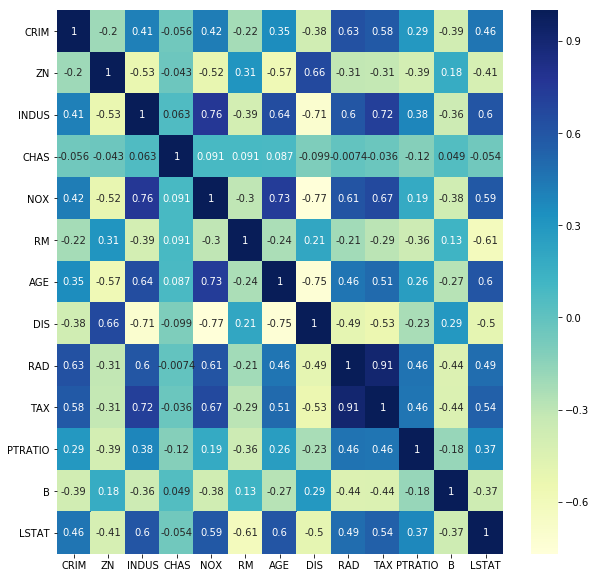

In [23]:
corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True,
        cmap="YlGnBu")